In [1]:
# Data management
import pandas as pd
import numpy as np

# Graphics
import matplotlib.pyplot as plt
from matplotlib.pyplot import text
import seaborn as sns
sns.set(font_scale=1.4)
sns.set_style("whitegrid")
sns.set_style({'font.family':'Arial'})
import matplotlib.ticker as plticker
import matplotlib.dates as md
import itertools
import matplotlib.ticker as ticker

## Article stats

In [2]:
articles = pd.read_csv('review.csv', usecols=[1,2,3,5,7], nrows=54, na_values=['N.A.', '#VALUE!'])
articles.Year = pd.to_datetime(articles.Year, format='%Y').dt.year
articles.columns = ['Discovery year', 'Discovery method', 'Discovery duration', 'Active onions', 'Discovery effectiveness']
articles['Active onions'] = articles['Active onions'].astype('float64')
display(articles)

,Discovery year,Discovery method,Discovery duration,Active onions,Discovery effectiveness
0,2012,Relays injection,2.0,6579.0,3289.500000
1,2012,Repositories,34.0,1171.0,34.441176
2,2013,TOR crawling,31.0,1450.0,46.774194
3,2014,Relays injection,160.0,12000.0,75.000000
4,2014,Relays injection,28.0,13337.0,476.321429
5,2015,Repositories,90.0,1000.0,11.111111
6,2015,Relays injection + TOR crawling + Onions Searc...,120.0,13145.0,109.541667
7,2015,Repositories + Generic Search Engines + TOR cr...,12.0,1974.0,164.500000
8,2015,Generic Search Engines + TOR crawling,35.0,4857.0,138.771429
9,2015,Repositories,30.0,3399.0,113.300000


## 1. Representiveness of discovery

In [3]:
onions = pd.read_csv('hidserv-dir-onions-seen-2014-01-01-2021-12-31.csv') 
onions['year'] = pd.to_datetime(onions.date, format='%d/%m/%Y').dt.year
onions.sample(5)

,date,onions,frac,year
1646,21/06/2019,85577.0,0.956262,2019
1799,21/11/2019,62803.0,0.975480,2019
305,19/10/2015,31318.0,0.039299,2015
1277,17/06/2018,106777.0,0.908085,2018
779,04/02/2017,61139.0,0.705115,2017


In [4]:
onions.dropna(inplace=True)
onions.sample(5)

,date,onions,frac,year
1538,05/03/2019,105940.0,0.947692,2019
2206,01/01/2021,171293.0,0.979877,2021
2325,30/04/2021,166133.0,0.971863,2021
1803,25/11/2019,61146.0,0.981882,2019
1012,25/09/2017,48991.0,0.837255,2017


In [5]:
existing = onions.groupby('year').agg({'onions':'mean'})
display(existing)

,onions
year,
2014,28296.142857
2015,29235.840000
2016,55523.262295
2017,54791.613699
2018,92405.073973
2019,82129.860274
2020,150729.707650
2021,143818.958904


In [6]:
articles['Existing onions'] = articles['Discovery year'].map(existing.onions.to_dict())
articles.sample(10)

,Discovery year,Discovery method,Discovery duration,Active onions,Discovery effectiveness,Existing onions
26,2017,Repositories + Onions Search Engines + TOR cra...,90.0,3536.0,39.288889,54791.613699
0,2012,Relays injection,2.0,6579.0,3289.500000,NaN
44,2019,Repositories,188.0,496.0,2.638298,82129.860274
43,2019,Repositories + TOR crawling + Relays injection,730.0,46562.0,63.783562,82129.860274
40,2018,Repositories + TOR crawling,60.0,1766.0,29.433333,92405.073973
48,2020,TOR crawling,7.3,12396.0,1698.082192,150729.707650
6,2015,Relays injection + TOR crawling + Onions Searc...,120.0,13145.0,109.541667,29235.840000
29,2017,Repositories + TOR crawling,120.0,7178.0,59.816667,54791.613699
36,2018,Relays injection,1.0,3900.0,3900.000000,92405.073973
23,2017,Repositories + Generic Search Engines + TOR cr...,42.0,29473.0,701.738095,54791.613699


In [7]:
articles['TOR area'] = round(articles['Active onions'] / articles['Existing onions']*100,2)
articles.sample(10)

,Discovery year,Discovery method,Discovery duration,Active onions,Discovery effectiveness,Existing onions,TOR area
14,2016,Repositories,2.0,5625.0,2812.500000,55523.262295,10.13
42,2019,Repositories + TOR crawling,NaN,9084.0,NaN,82129.860274,11.06
3,2014,Relays injection,160.0,12000.0,75.000000,28296.142857,42.41
47,2020,Repositories + TOR crawling,NaN,48174.0,NaN,150729.707650,31.96
35,2018,Generic Search Engines + TOR crawling,60.0,2527.0,42.116667,92405.073973,2.73
10,2016,Repositories + TOR crawling,1.0,1500.0,1500.000000,55523.262295,2.70
0,2012,Relays injection,2.0,6579.0,3289.500000,NaN,NaN
18,2016,Repositories + TOR crawling,NaN,5295.0,NaN,55523.262295,9.54
5,2015,Repositories,90.0,1000.0,11.111111,29235.840000,3.42
29,2017,Repositories + TOR crawling,120.0,7178.0,59.816667,54791.613699,13.10


In [8]:
data = pd.concat([onions.groupby('year').agg({'onions':'mean'}),articles.groupby('Discovery year').agg({'Active onions':['mean','max']})],axis=1)
data.columns = ['Total onions', 'Average discovered onions', 'Max discovered onions']
data.dropna(inplace=True)
data.reset_index(inplace=True)
data['index']=data['index'].astype('category')
display(data)

,index,Total onions,Average discovered onions,Max discovered onions
0,2014,28296.142857,12668.500000,13337.0
1,2015,29235.840000,4875.000000,13145.0
2,2016,55523.262295,6892.181818,23585.0
3,2017,54791.613699,11207.909091,29473.0
4,2018,92405.073973,17850.500000,82145.0
5,2019,82129.860274,12486.000000,46562.0
6,2020,150729.707650,13753.600000,48174.0
7,2021,143818.958904,3797.500000,4000.0


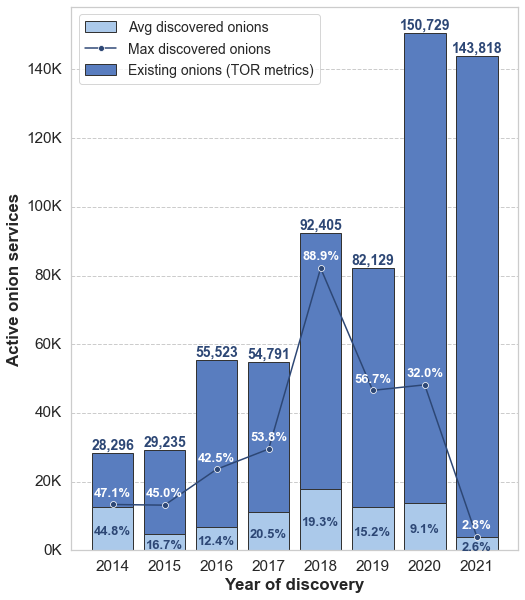

In [24]:
# Initialize the matplotlib figure
plt.rcParams.update({'font.size': 16})
f, ax = plt.subplots(figsize=(8,10))

sns.set_color_codes("muted")
sns.barplot(y="Total onions",
            x='index',
            data=data,
            order=data.sort_values(by='index', ascending=True)['index'],
            label="Existing onions (TOR metrics)",
            color="b",
            linewidth=1,
            edgecolor=".2")

sns.set_color_codes("pastel")
sns.barplot(y="Average discovered onions",
            x='index',
            order=data.sort_values(by='index', ascending=True)['index'],
            data=data,
            label="Avg discovered onions",
            color="b",
            linewidth=1,
            edgecolor=".2")

sns.lineplot(data=data['Max discovered onions'],
             linestyle='-',
             marker='o',
             label='Max discovered onions',
             color='#2D4775')


# Add a legend and informative axis label
handles,labels = ax.get_legend_handles_labels()
handles = [handles[2], handles[0], handles[1]]
labels = [labels[2], labels[0], labels[1]]
ax.legend(handles, labels)
plt.setp(plt.gca().get_legend().get_texts(), fontsize='14')

ax.set_xlabel('Year of discovery', weight='bold')
ax.set_ylabel('Active onion services', weight='bold')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))


for pos, row in data.iterrows():
    ax.annotate(f"{int(row['Total onions']):,}", (pos, row['Total onions']+4300),
                 color='#2D4775', va='top', ha='center', fontsize=14, weight='bold')
    ax.annotate(f"{round(100*round(row['Average discovered onions']/row['Total onions'],4), 1)}%", (pos, row['Average discovered onions']/2+800),
                 color='#2D4775', va='top', ha='center', fontsize=13, weight='bold')
    ax.annotate(f"{round(100*round(row['Max discovered onions']/row['Total onions'],4), 1)}%", (pos, row['Max discovered onions']+5000),
                 color='white', va='top', ha='center', fontsize=13, weight='bold')
    
for label in ax.yaxis.get_majorticklabels():
    label.set_verticalalignment('center')

#sns.despine(left=True, bottom=True)


plt.savefig('numbers.pdf',transparent=True)

##### TOR area

In [10]:
articles.groupby('Discovery year').agg({'TOR area':['mean','max']})

TOR area       
                     mean    max
Discovery year                  
2012                  NaN    NaN
2013                  NaN    NaN
2014            44.770000  47.13
2015            16.674000  44.96
2016            12.412727  42.48
2017            20.456364  53.79
2018            19.317000  88.90
2019            15.200000  56.69
2020             9.122000  31.96
2021             2.640000   2.78

## Performance of discovery techniques

In [11]:
articles['Discovery method'].value_counts()

Repositories + TOR crawling                                21
Repositories                                                8
TOR crawling                                                7
Relays injection                                            6
Repositories + Generic Search Engines + TOR crawling        3
Generic Search Engines + TOR crawling                       3
Relays injection + TOR crawling + Onions Search Engines     1
Onions Search Engines                                       1
Repositories + Onions Search Engines + TOR crawling         1
Relays injection + TOR crawling                             1
Repositories + Onions Search Engines                        1
Repositories + TOR crawling + Relays injection              1
Name: Discovery method, dtype: int64

In [12]:
acc = articles.dropna()
acc['Discovery method']=acc['Discovery method'].map(lambda t : t.split(' + '))
acc

C:\Users\Javier\anaconda3\envs\COVID19\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Discovery year,Discovery method,Discovery duration,Active onions,Discovery effectiveness,Existing onions,TOR area
3,2014,[Relays injection],160.0,12000.0,75.000000,28296.142857,42.41
4,2014,[Relays injection],28.0,13337.0,476.321429,28296.142857,47.13
5,2015,[Repositories],90.0,1000.0,11.111111,29235.840000,3.42
6,2015,"[Relays injection, TOR crawling, Onions Search...",120.0,13145.0,109.541667,29235.840000,44.96
7,2015,"[Repositories, Generic Search Engines, TOR cra...",12.0,1974.0,164.500000,29235.840000,6.75
8,2015,"[Generic Search Engines, TOR crawling]",35.0,4857.0,138.771429,29235.840000,16.61
9,2015,[Repositories],30.0,3399.0,113.300000,29235.840000,11.63
10,2016,"[Repositories, TOR crawling]",1.0,1500.0,1500.000000,55523.262295,2.70
11,2016,[Repositories],1.0,790.0,790.000000,55523.262295,1.42
12,2016,"[Repositories, TOR crawling]",3.0,7257.0,2419.000000,55523.262295,13.07


In [13]:
acc = acc.explode('Discovery method')
acc.reset_index(drop=True, inplace=True)
acc

,Discovery year,Discovery method,Discovery duration,Active onions,Discovery effectiveness,Existing onions,TOR area
0,2014,Relays injection,160.0,12000.0,75.000000,28296.142857,42.41
1,2014,Relays injection,28.0,13337.0,476.321429,28296.142857,47.13
2,2015,Repositories,90.0,1000.0,11.111111,29235.840000,3.42
3,2015,Relays injection,120.0,13145.0,109.541667,29235.840000,44.96
4,2015,TOR crawling,120.0,13145.0,109.541667,29235.840000,44.96
...,...,...,...,...,...,...,...
66,2019,Repositories,27.0,3288.0,121.777778,82129.860274,4.00
67,2019,TOR crawling,27.0,3288.0,121.777778,82129.860274,4.00
68,2019,Repositories,1.0,3000.0,3000.000000,82129.860274,3.65
69,2020,TOR crawling,7.3,12396.0,1698.082192,150729.707650,8.22


In [14]:
df_acc = acc.groupby('Discovery method')['Discovery effectiveness'].agg(['min','max', 'mean']).sort_values('mean', ascending=True)
df_acc

,min,max,mean
Discovery method,,,
Onions Search Engines,39.288889,368.882353,172.570969
Generic Search Engines,42.116667,906.333333,345.989286
TOR crawling,7.263923,2419.000000,372.033779
Repositories,2.638298,3000.000000,511.688587
Relays injection,63.783562,3900.000000,772.440396


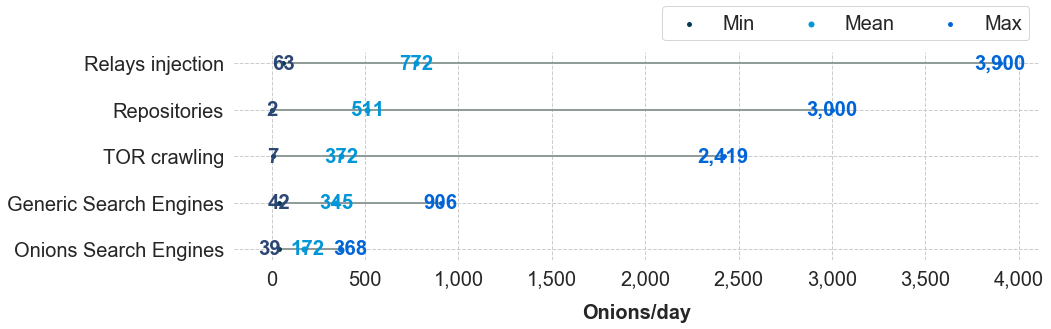

In [132]:
from matplotlib import pyplot as plt
#plt.rcParams.update({'font.size': 22})
sns.set(font_scale=1.7)
sns.set_style("whitegrid")
sns.set_style({'font.family':'Arial'})

#Import data

plt.figure(figsize = (15, 5))
sns.set_style("whitegrid", {'grid.linestyle': '--'})
#my_range=range(1,len(df_acc.index)+1)
my_range=[1,2,3,4,5,]

ax = plt.axes(frameon=False)
plt.hlines(y=my_range, xmin=df_acc['min'], xmax=df_acc['max'], color='#8f9c9a', lw =2)
plt.scatter(df_acc['min'], my_range, color='#003953', s=15, label='Min', zorder=3, marker='o')
plt.scatter(df_acc['mean'], my_range, color='#0096d7', s=25, label='Mean', zorder=3, marker='o')
plt.scatter(df_acc['max'], my_range, color='#0065d7', s=15, label='Max', zorder=3, marker='o')

i = 1.2
for pos, row in df_acc.iterrows():
    #print(pos, row)
    mindiff = 0
    maxsum = 0
    meansum = 0
    
    if i==1.2:
        mindiff=50
        maxsum=50
        meansum=20
    
    ax.annotate(f"{int(row['min'])}", (row['min']-mindiff, i),
                 color='#2D4775', va='top', ha='center', weight='bold')
    ax.annotate(f"{int(row['mean'])}", (row['mean']+meansum, i),
                 color='#0096d7', va='top', ha='center',  weight='bold')
    ax.annotate(f"{int(row['max']):,}", (row['max']+maxsum, i),
                 color="#0065d7", va='top', ha='center', weight='bold')
    i+=1

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,}'.format(x)))
plt.yticks(fontsize=20, rotation=0)
plt.xticks(fontsize=20)

    
plt.legend(ncol=3, bbox_to_anchor=(1., 1.01), loc="lower right", frameon=True)
plt.yticks(my_range, df_acc.index)
plt.xticks(range(0,4001,500))
#plt.title("Min and Max effectiveness", loc='left', fontsize=14)
plt.xlabel('Onions/day', weight='bold', labelpad=14, fontsize=20)
plt.setp(plt.gca().get_legend().get_texts(), fontsize=20)
plt.tight_layout()
plt.savefig("lollypop.pdf")
plt.savefig("lollypop.svg")
#plt.close()